<a id="toc"></a>
<p><center style="color:darkblue; font-family: 'Pacifico', cursive; font-size:25px;">Thanks for visiting my notebook </center></p>

<div style="background-color:white; padding: 2px;">
<div class="alert alert-block alert-secondary" style="font-size:35px; font-family:'Merriweather'; text-align:center">  📦🔍 Complete Sentiment Analysis of Amazon Reviews 😊📉</div></div>

<div>

 <h2 align="left"><font color=darkblue>About the Notebook</font></h2>

`Sentiment Analysis` is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

In this notebook we will be doing some sentiment analysis on amazon food reviews in python using different techniques.

Feel free to learn from the notebook as per your needs. If you find it nice exploring, please upvote it so that it can reach others and also I get motivated to build more interesting notebooks.

<div>

 <h2 align="left"><font color=darkblue>Table of Contents</font></h2></div>
 
<a id="toc"></a>
- [ 1 - Getting Started](#1)
- [ 2 - Data Exposure](#2)
- [ 3 - Undersampling of Dataset](#3)
- [ 4 - Basic Text Processing using NLTK](#4)
- [ 5 - Sentiment Scoring using NLTK Opinion Lexicon ](#5)
- [ 6 - Sentiment Scoring using VADER](#6)
- [ 7 - Sentiment Scoring using RoBERTa](#7)
- [ 8 - Combining and Comparison of Results from VADER and RoBERTa](#8)
- [ 9 - Review of Unusual examples with VADER and RoBERTa ](#9)
- [ 10 - Sentiment Scoring using HuggingFace Pipeline](#10)

<a id="toc"></a>

<a href="#toc" style="background-color: blue; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="1"></a>
## <b><span style='color:darkblue'>Importing Basic Modules</span></b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
plt.style.use('ggplot')

In [2]:
data= pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<a id="toc"></a>

<a href="#toc" style="background-color: blue; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="2"></a>
## <b><span style='color:darkblue'>Data Dictionary</span></b>

- **Id**: A unique identifier for each review.
- **ProductId**: The unique identifier for each product reviewed.
- **UserId**: The unique identifier for the user who left the review.
- **ProfileName**: The name of the user profile.
- **HelpfulnessNumerator**: The number of users who found the review helpful.
- **HelpfulnessDenominator**: The total number of users who voted on the helpfulness of the review.
- **Score**: The rating given by the user, on a scale from 1 to 5.
- **Time**: The timestamp of the review in Unix time.
- **Summary**: A short summary or title of the review.
- **Text**: The full text of the review.

In [3]:
data.shape

(568454, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
review_count= data.Score.value_counts()
review_count

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

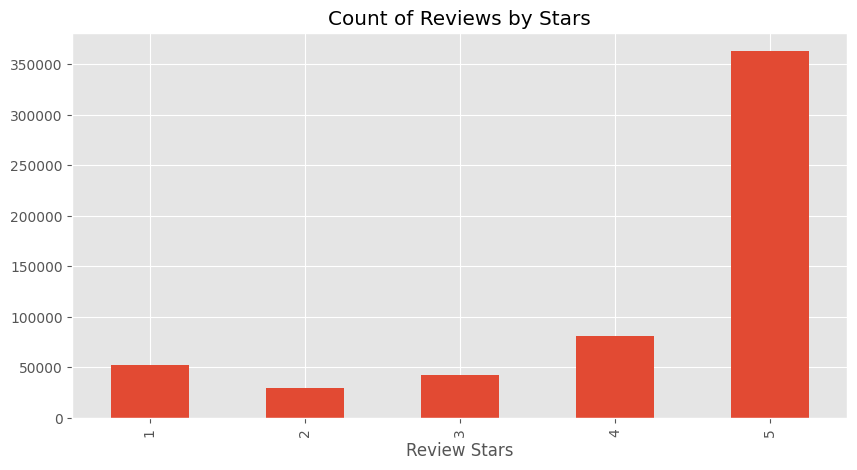

In [6]:
# study the distribution of the five categories
ax = review_count.sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [7]:
len(data['Id'].value_counts(dropna=False))

568454

<a id="toc"></a>

<a href="#toc" style="background-color: blue; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="3"></a>
## <b><span style='color:darkblue'>Undersampling of Reviews</span></b>

Taking a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5. This way you get a smaller balanced corpus, on which we will work ahead.

In [8]:
one_1500 = data[data['Score']==1].sample(n=1500)
two_500 = data[data['Score']==2].sample(n=500)
three_500 = data[data['Score']==3].sample(n=500)
four_500 = data[data['Score']==4].sample(n=500)
five_1500 = data[data['Score']==5].sample(n=1500)

In [9]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)

In [10]:
undersampled_reviews['Score'].value_counts(dropna=False)

Score
1    1500
5    1500
2     500
3     500
4     500
Name: count, dtype: int64

<Axes: xlabel='Score', ylabel='count'>

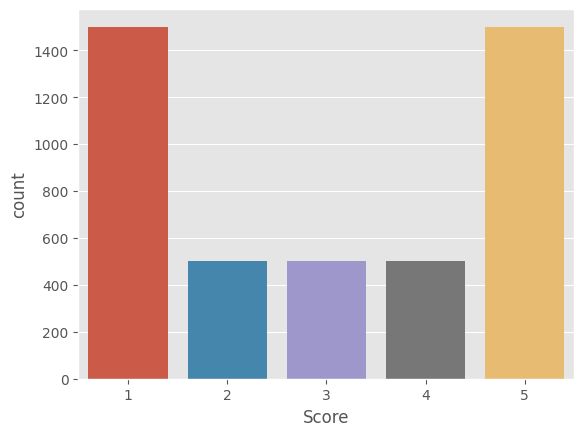

In [11]:
sns.countplot(data=undersampled_reviews, x='Score')

### Random Sampling of 100K Reviews

In [12]:
sample_100K_revs = data.sample(n=100000, random_state=42)
sample_100K_revs.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
433954,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
70260,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


### Writing Corpora

In [13]:
# small corpus
undersampled_reviews.to_csv("/kaggle/working/small_corpus.csv", index=False)

In [14]:
# big corpus
sample_100K_revs.to_csv("/kaggle/working/big_corpus.csv", index=False)

<a id="toc"></a>

<a href="#toc" style="background-color: blue; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="4"></a>
## <b><span style='color:darkblue'>Basic Text Processing using NLTK</span></b>

In [15]:
reviews=undersampled_reviews
reviews.shape

(4500, 10)

In [16]:
example = reviews['Text'].iloc[49]
print(example)

My wife and I have used this product for some time now.  When it first came out, they claimed no dust.  Well, there was always dust, but because it was natural and scooped, we decided to keep using it.  This was a big mistake.  This litter tracks all over the house and has ruined 2 vacuum cleaners because the dust is so fine it bypasses the bag and enters / cloggs the motor mechanisms.<br /><br />We have 3 cats that all are suffering terribly from respiratory issues caused by the dust from this litter.  If you don't believe that there's dust, as some of the reviews have claimed, then just simply OPEN YOUR BLINDS on your windows, allow the sunlight to come into the room / the boxes you're scooping,  and then scoop it,  or move it around in the box.  You won't believe the huge amount of micro-fine dust that billows out of the boxes.  You can't see these "dusts" in standard interior light, but if the sun is bright enough shining through the window, it's amazing how far up this stuff trave

In [17]:
# splitting text into words and conjunctions or simply tokens
nltk.word_tokenize(example)

['My',
 'wife',
 'and',
 'I',
 'have',
 'used',
 'this',
 'product',
 'for',
 'some',
 'time',
 'now',
 '.',
 'When',
 'it',
 'first',
 'came',
 'out',
 ',',
 'they',
 'claimed',
 'no',
 'dust',
 '.',
 'Well',
 ',',
 'there',
 'was',
 'always',
 'dust',
 ',',
 'but',
 'because',
 'it',
 'was',
 'natural',
 'and',
 'scooped',
 ',',
 'we',
 'decided',
 'to',
 'keep',
 'using',
 'it',
 '.',
 'This',
 'was',
 'a',
 'big',
 'mistake',
 '.',
 'This',
 'litter',
 'tracks',
 'all',
 'over',
 'the',
 'house',
 'and',
 'has',
 'ruined',
 '2',
 'vacuum',
 'cleaners',
 'because',
 'the',
 'dust',
 'is',
 'so',
 'fine',
 'it',
 'bypasses',
 'the',
 'bag',
 'and',
 'enters',
 '/',
 'cloggs',
 'the',
 'motor',
 'mechanisms.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'We',
 'have',
 '3',
 'cats',
 'that',
 'all',
 'are',
 'suffering',
 'terribly',
 'from',
 'respiratory',
 'issues',
 'caused',
 'by',
 'the',
 'dust',
 'from',
 'this',
 'litter',
 '.',
 'If',
 'you',
 'do',
 "n't",
 'believe'

In [18]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['My', 'wife', 'and', 'I', 'have', 'used', 'this', 'product', 'for', 'some']

In [19]:
# part of speech tagging
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('My', 'PRP$'),
 ('wife', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('used', 'VBN'),
 ('this', 'DT'),
 ('product', 'NN'),
 ('for', 'IN'),
 ('some', 'DT')]

In [20]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  My/PRP$
  wife/NN
  and/CC
  I/PRP
  have/VBP
  used/VBN
  this/DT
  product/NN
  for/IN
  some/DT
  time/NN
  now/RB
  ./.
  When/WRB
  it/PRP
  first/RB
  came/VBD
  out/RP
  ,/,
  they/PRP
  claimed/VBD
  no/DT
  dust/NN
  ./.
  Well/RB
  ,/,
  there/EX
  was/VBD
  always/RB
  dust/JJ
  ,/,
  but/CC
  because/IN
  it/PRP
  was/VBD
  natural/JJ
  and/CC
  scooped/VBD
  ,/,
  we/PRP
  decided/VBD
  to/TO
  keep/VB
  using/VBG
  it/PRP
  ./.
  This/DT
  was/VBD
  a/DT
  big/JJ
  mistake/NN
  ./.
  This/DT
  litter/NN
  tracks/VBZ
  all/DT
  over/IN
  the/DT
  house/NN
  and/CC
  has/VBZ
  ruined/VBN
  2/CD
  vacuum/NN
  cleaners/NNS
  because/IN
  the/DT
  dust/NN
  is/VBZ
  so/RB
  fine/JJ
  it/PRP
  bypasses/VBZ
  the/DT
  bag/NN
  and/CC
  enters/NNS
  //VBP
  cloggs/VBZ
  the/DT
  motor/NN
  mechanisms./NN
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NN
  We/PRP
  have/VBP
  3/CD
  cats/NNS
  that/IN
  all/DT
  are/VBP
  suffering/VBG
  terribly/RB
  from/IN
  r

<a id="toc"></a>

<a href="#toc" style="background-color: blue; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="5"></a>
## <b><span style='color:darkblue'>Sentiment Scoring using NLTK Opinion Lexicon</span></b>

In [21]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize
from string import punctuation
from nltk.tokenize import TreebankWordTokenizer

In [22]:
nltk.download("opinion_lexicon")

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [23]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [24]:
def get_sentiment_score_oplex(text):
    
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0

    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))

    
    return total_score

In [25]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
96675,96676,B0051C0J6M,AWFA8N9IXELVH,No Pen Name,0,0,1,1351123200,Deceptive description,On Oct 9 I ordered from a different vendor the...
234185,234186,B002DMXSUW,AWT7GQNQTKU43,Carlos A Rubio,0,0,1,1336867200,Complete steal,"Makes no sense how the 200g package costs ~$7,..."
333527,333528,B00188S3PM,A2EMM13TIU7IML,I. Santos,1,2,1,1298592000,Not even close...,"This was a waste of money, the item was late, ..."
525743,525744,B000CQT5VC,A17BDHTJ77ZVXU,"Ro M ""Rosa""",36,38,1,1264032000,Honey Colored Sugar - Nothing More,Though not especially clear in the product det...
213595,213596,B00141OVJA,A20RDJ4OKOWPOF,Pat,0,0,1,1350604800,Proceed With Caution,My beloved black Lab recently experienced live...


In [26]:
# dropping any missing values from the targetted text column
reviews.dropna(subset=['Text'], inplace=True)
reviews.shape

(4500, 10)

In [27]:
reviews['oplex_sentiment_score'] = reviews['Text'].apply(lambda x: get_sentiment_score_oplex(x))

In [28]:
reviews[['Text','oplex_sentiment_score']].sample(2)

,Text,oplex_sentiment_score
322947,"These are some of the crunchiest ,golden, pota...",0.181818
404250,I've been giving these bones to my 3 dogs for ...,0.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


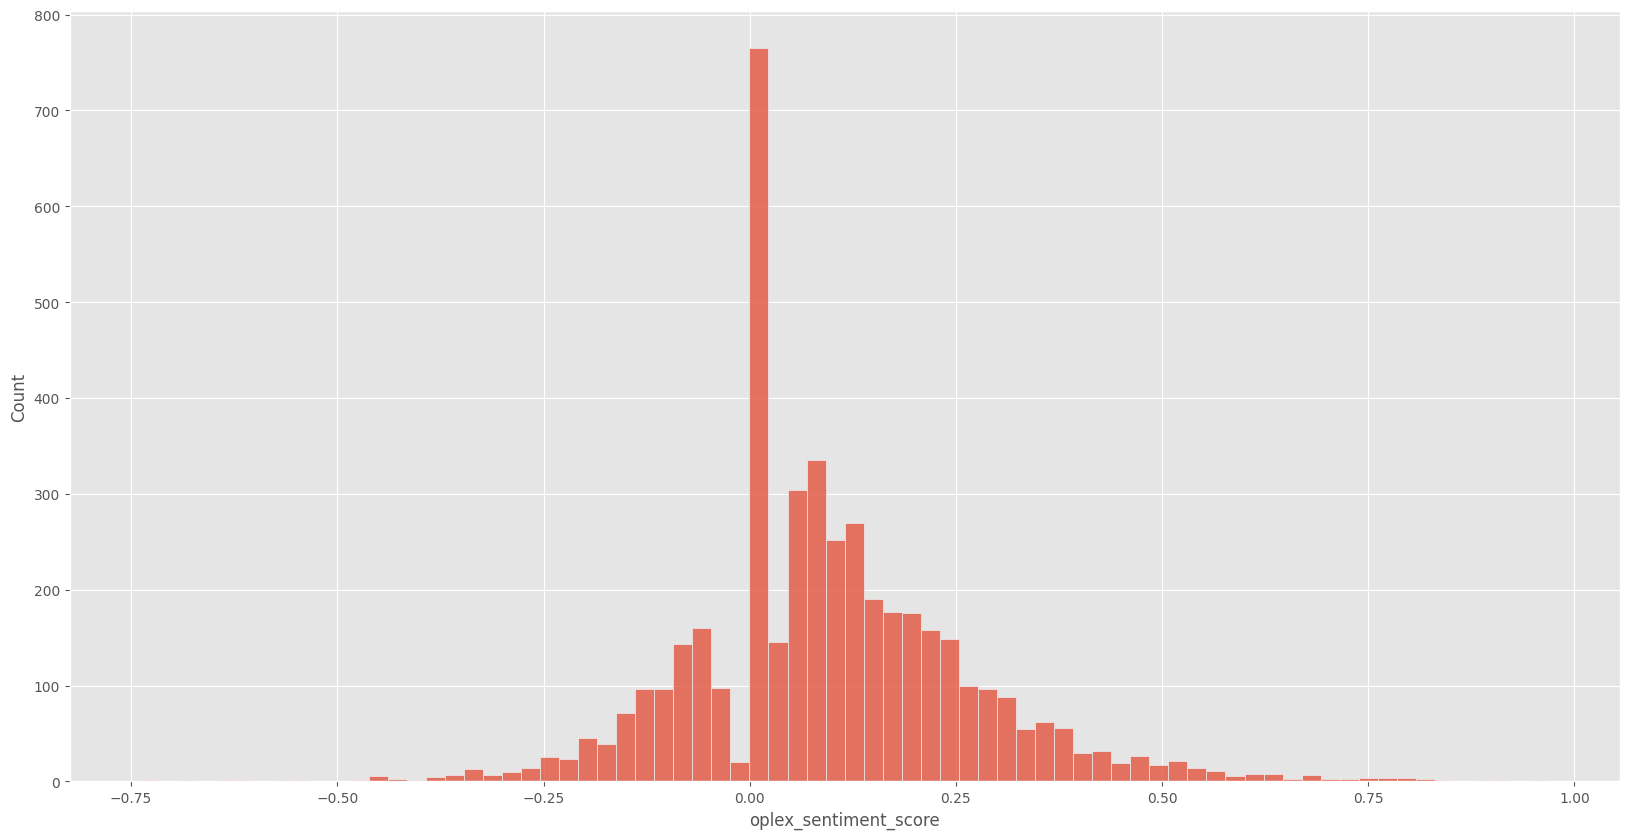

In [29]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()

In [30]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))

<Axes: xlabel='Score', ylabel='count'>

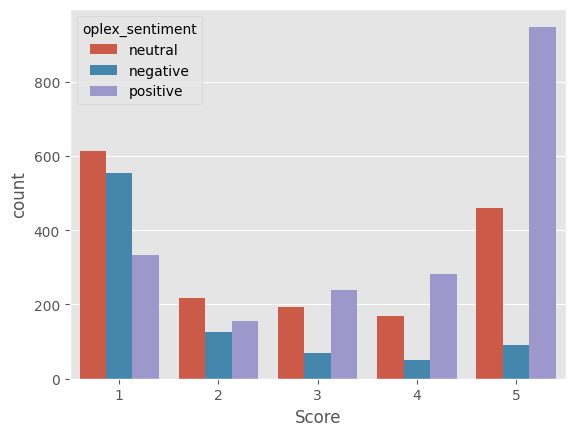

In [31]:
sns.countplot(x='Score', hue='oplex_sentiment' ,data = reviews)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='oplex_sentiment', ylabel='Score'>

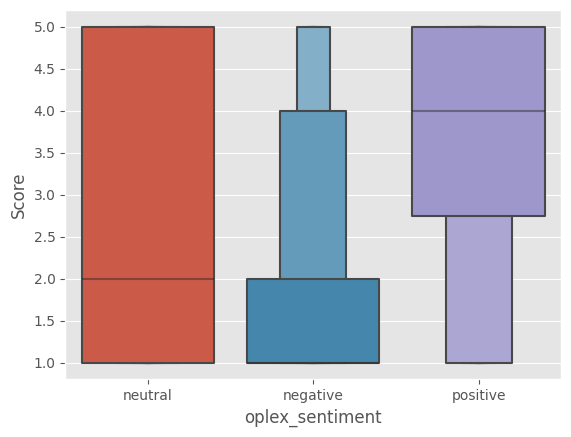

In [32]:
sns.boxenplot(x='oplex_sentiment', y='Score', data = reviews)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

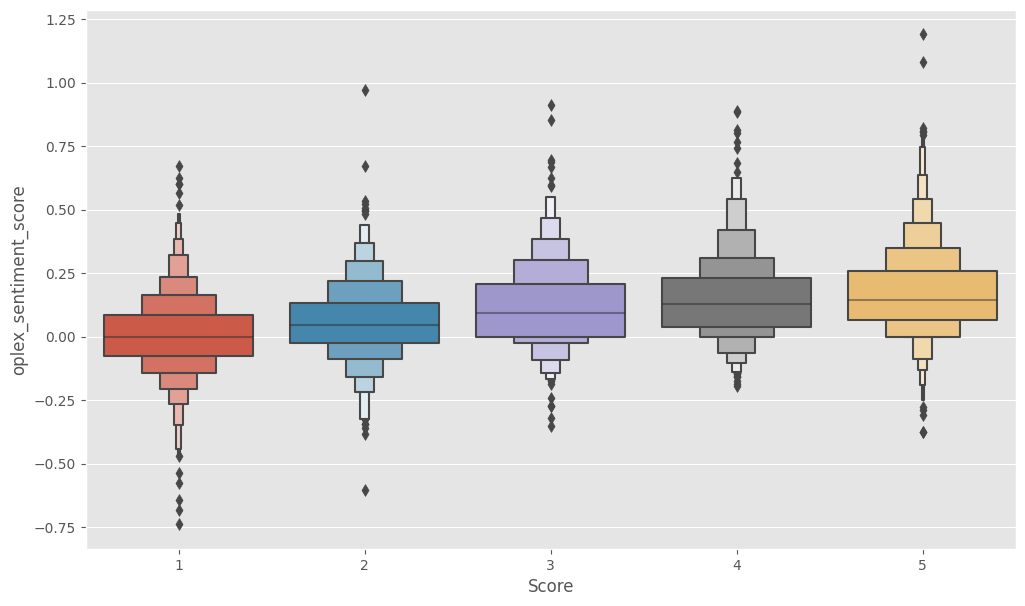

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='Score', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()

In [34]:
reviews['true_sentiment'] = \
    reviews['Score'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [35]:
y_true = reviews['true_sentiment'].tolist()

In [36]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()

In [37]:
from sklearn.metrics import confusion_matrix
oplex_cm = confusion_matrix(y_true, y_oplex_pred)

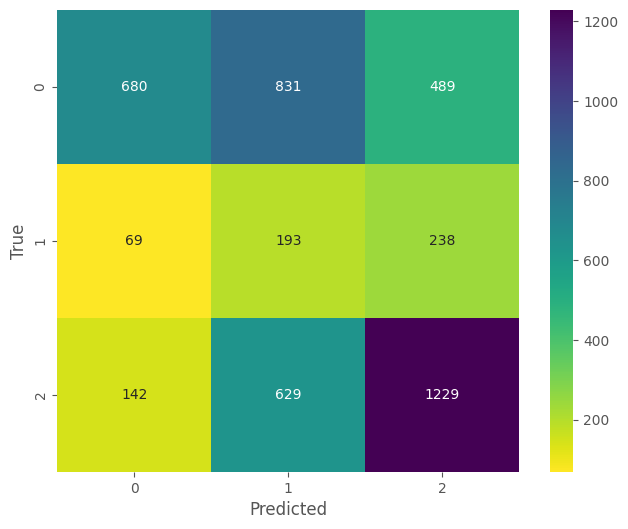

In [38]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [39]:
oplex_cm = list(oplex_cm.ravel())

In [40]:
oplex_cm

[680, 831, 489, 69, 193, 238, 142, 629, 1229]

**Positive Label Assessment**

In [41]:
tp, tn, fp, fn = 1198, 654+870+79+187, 476+234, 157+645

In [42]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.599
precission: 0.6278825995807128
f1 score: 0.6131013306038895


**Negative Label Assessment**

In [43]:
tp, tn, fp, fn = 654, 187+234+645+1198, 79+157, 870+476
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.327
precission: 0.7348314606741573
f1 score: 0.45259515570934256


<a id="toc"></a>

<a href="#toc" style="background-color: blue; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="6"></a>
## <b><span style='color:darkblue'>VADER Sentiment Scoring</span></b>

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a powerful sentiment analysis tool that’s specifically designed for social media content and works well with texts from other domains as well. Unlike traditional machine learning models, VADER is rule-based and doesn’t require extensive training data. Here are some key features of VADER:

1. Lexicon-Based Approach: It uses a pre-defined lexicon (a dictionary of words and their associated sentiment scores) to analyze text. Each word is assigned a polarity score (positive, negative, or neutral).
2. Rule-Based Scoring: Instead of relying on statistical models, VADER applies a set of rules to calculate the overall sentiment score of a piece of text. These rules consider factors like negations, punctuation, capitalization, and emoticons.
3. Social Media Focus: It is particularly effective at capturing sentiments expressed in social media posts, where informal language, slang, and emoticons are common.
4. Efficiency: It consumes fewer resources compared to ML models, making it a lightweight option for sentiment analysis tasks

We will use NLTK's `SentimentIntensityAnalyzer` to get the negative/neutral/positive scores of the text.

- In simple words, this uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [45]:
sia.polarity_scores("I am so happy after eating cremica's dark chocolate brownie!")

{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.6468}

In [46]:
sia.polarity_scores('This is the worst thing I have ever eaten.')

{'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249}

In [48]:
example = reviews['Text'].iloc[20]
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.9495}

In [49]:
# Grabbing the polarity scores on the small corpus
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/4500 [00:00<?, ?it/s]

In [50]:
pd.DataFrame(res)

,96676,234186,333528,525744,213596,267939,52509,75182,1154,410476,...,316440,362565,82388,37037,398195,370646,199327,351349,520216,204559
neg,0.0240,0.053,0.3970,0.0550,0.1590,0.111,0.0730,0.0730,0.1100,0.0230,...,0.0600,0.0000,0.0640,0.0360,0.0430,0.144,0.0340,0.0000,0.000,0.0000
neu,0.9340,0.947,0.6030,0.8840,0.7650,0.679,0.8420,0.8320,0.8090,0.8910,...,0.8460,0.6900,0.6690,0.8700,0.6500,0.687,0.6350,0.7400,0.512,0.6660
pos,0.0420,0.000,0.0000,0.0620,0.0760,0.210,0.0850,0.0950,0.0810,0.0860,...,0.0950,0.3100,0.2670,0.0940,0.3070,0.168,0.3310,0.2600,0.488,0.3340
compound,0.4304,-0.296,-0.9154,0.5443,-0.8948,0.837,0.8545,0.5499,-0.2247,0.7351,...,0.5232,0.9246,0.9459,0.9293,0.9749,0.474,0.9722,0.9643,0.936,0.9329


In [51]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(reviews, how='left')

In [52]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,oplex_sentiment_score,oplex_sentiment,true_sentiment
0,96676,0.024,0.934,0.042,0.4304,B0051C0J6M,AWFA8N9IXELVH,No Pen Name,0,0,1,1351123200,Deceptive description,On Oct 9 I ordered from a different vendor the...,0.000000,neutral,negative
1,234186,0.053,0.947,0.000,-0.2960,B002DMXSUW,AWT7GQNQTKU43,Carlos A Rubio,0,0,1,1336867200,Complete steal,"Makes no sense how the 200g package costs ~$7,...",0.000000,neutral,negative
2,333528,0.397,0.603,0.000,-0.9154,B00188S3PM,A2EMM13TIU7IML,I. Santos,1,2,1,1298592000,Not even close...,"This was a waste of money, the item was late, ...",-0.058824,negative,negative
3,525744,0.055,0.884,0.062,0.5443,B000CQT5VC,A17BDHTJ77ZVXU,"Ro M ""Rosa""",36,38,1,1264032000,Honey Colored Sugar - Nothing More,Though not especially clear in the product det...,0.036000,neutral,negative
4,213596,0.159,0.765,0.076,-0.8948,B00141OVJA,A20RDJ4OKOWPOF,Pat,0,0,1,1350604800,Proceed With Caution,My beloved black Lab recently experienced live...,0.067901,neutral,negative


### Plot VADER results

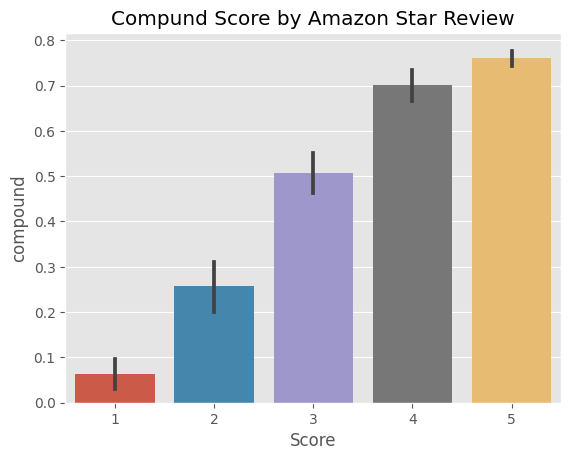

In [53]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

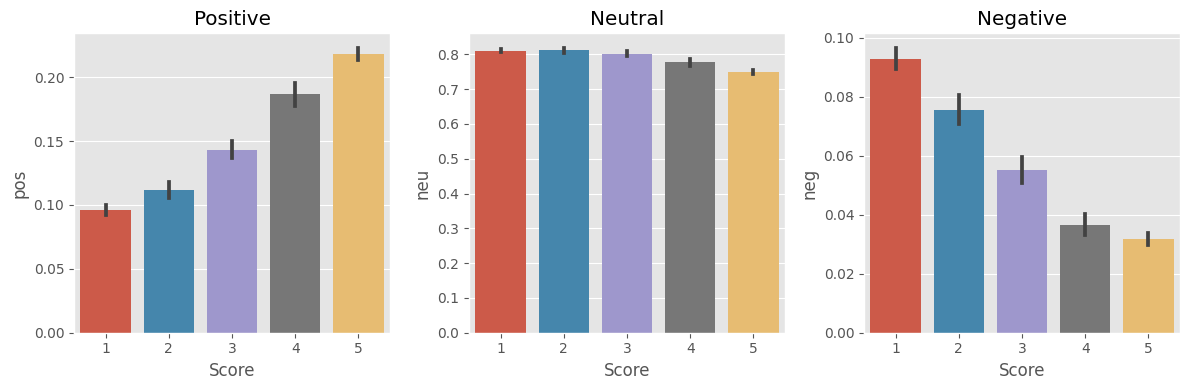

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

<a id="toc"></a>

<a href="#toc" style="background-color: blue; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="7"></a>
## <b><span style='color:darkblue'>Sentiment Scoring using RoBERTa from 🤗</span></b>

RoBERTa is a transformers model that builds upon Google’s BERT model. **It is pretrained on a large corpus of English data** in a self-supervised fashion. This means it was trained on raw texts without human labeling, using publicly available data. It has modified key hyperparameters compared to BERT. Notably, it removes the next-sentence pretraining objective, trains with larger mini-batches and learning rates, and uses a byte-level BPE tokenizer (similar to GPT-2).
​
- Popular model which accounts for the words but also the `context` related to other words.

In [55]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [56]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [57]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')     # pt is being used for pytorch
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.11831172, 'roberta_neu': 0.2960025, 'roberta_pos': 0.5856858}


In [58]:
# function to calculate polarity scores for each text
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

<a id="toc"></a>

<a href="#toc" style="background-color: blue; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="8"></a>
## <b><span style='color:darkblue'>Combine and Compare</span></b>

- Combining results of VADER and RoBERTa
- Comparing scores between models

In [60]:
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    roberta_result = polarity_scores_roberta(text)
    break

  0%|          | 0/4500 [00:00<?, ?it/s]

In [61]:
vader_result

{'neg': 0.024, 'neu': 0.934, 'pos': 0.042, 'compound': 0.4304}

In [62]:
roberta_result

{'roberta_neg': 0.016307466,
 'roberta_neu': 0.13641363,
 'roberta_pos': 0.84727895}

In [64]:
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/4500 [00:00<?, ?it/s]

Broke for id 52509
Broke for id 181310
Broke for id 407497
Broke for id 150014
Broke for id 387227
Broke for id 295087
Broke for id 450971
Broke for id 335840
Broke for id 133421
Broke for id 312559
Broke for id 12009
Broke for id 224295
Broke for id 375535
Broke for id 77844
Broke for id 498353
Broke for id 499906
Broke for id 353749
Broke for id 526827
Broke for id 523981
Broke for id 208375
Broke for id 188635
Broke for id 372585
Broke for id 248257
Broke for id 70308
Broke for id 360669
Broke for id 345906
Broke for id 89590
Broke for id 373455
Broke for id 416703
Broke for id 105192
Broke for id 333254
Broke for id 135874
Broke for id 181229
Broke for id 492330
Broke for id 136433
Broke for id 563950
Broke for id 404820
Broke for id 56739
Broke for id 373432
Broke for id 510601
Broke for id 531469
Broke for id 322355
Broke for id 159801
Broke for id 485268
Broke for id 551783
Broke for id 339781
Broke for id 545770
Broke for id 485904
Broke for id 43720
Broke for id 382324
Broke f

In [66]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(reviews, how='left')

In [67]:
results_df.head(2)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,oplex_sentiment_score,oplex_sentiment,true_sentiment
0,96676,0.024,0.934,0.042,0.4304,0.016307,0.136414,0.847279,B0051C0J6M,AWFA8N9IXELVH,No Pen Name,0,0,1,1351123200,Deceptive description,On Oct 9 I ordered from a different vendor the...,0.0,neutral,negative
1,234186,0.053,0.947,0.000,-0.2960,0.546364,0.391684,0.061952,B002DMXSUW,AWT7GQNQTKU43,Carlos A Rubio,0,0,1,1336867200,Complete steal,"Makes no sense how the 200g package costs ~$7,...",0.0,neutral,negative


In [68]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'oplex_sentiment_score',
       'oplex_sentiment', 'true_sentiment'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

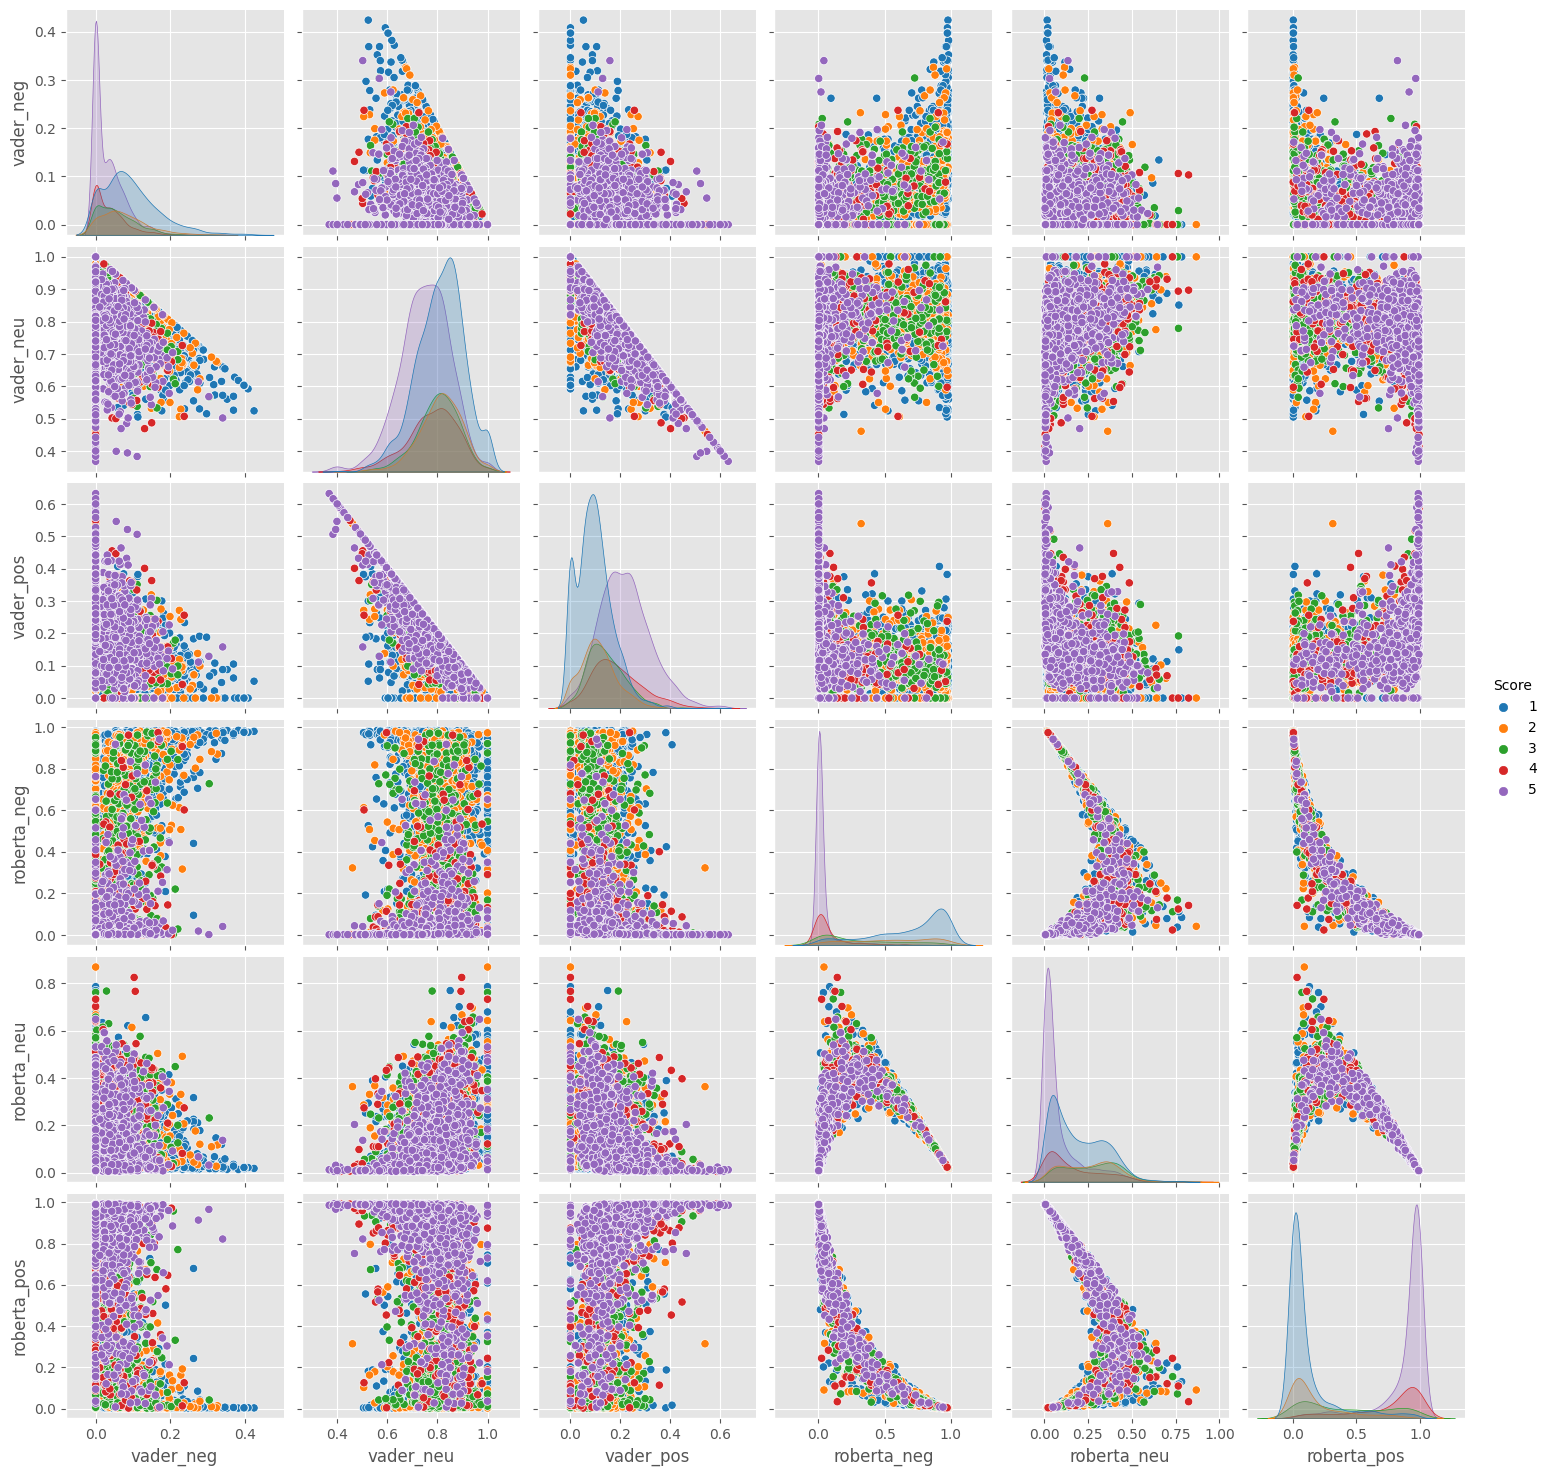

In [69]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

<a id="toc"></a>

<a href="#toc" style="background-color: blue; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="9"></a>
## <b><span style='color:darkblue'>Reviewing unusual examples for VADER and RoBERTa</span></b>

**positive sentiment 1-star review**

In [70]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I just purchased the Cuisinart cup o matic and just love it. I have been trying all different types of pods even though I can use regular ground coffee and the Senseo dark roast is our favorite. The deal with 6 bags of 18 for 27dollars is a better deal than most especially with no cost for shipping. I give this a 5 somehow it only shows 1 but AAAAA+'

In [71]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'Quality of product is excellent, cost is excellent and delivery is superb.  Very satisfied.'

**nevative sentiment 5-Star view**

In [72]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'My male Rottweiler has allergies and can have these snacks without worry.  Unfortunately, they are hard to find, extremely expensive at more than $10 a bag (about 14 small bones,) and the shipping and handling costs are KILLER.  Omega Paw is not at all interested in making the product more easily accessible or selling in bulk.  Frustrating.'

In [73]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'These are great tasting.  I always carry 1 with me to avoid any "bad food" choices I will regret later!'

<a id="toc"></a>

<a href="#toc" style="background-color: blue; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="10"></a>
## <b><span style='color:darkblue'>Sentiment Scoring using Transformers Pipeline</span></b>

In [74]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

2024-07-25 18:55:59.670581: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 18:55:59.670763: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 18:55:59.815795: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [75]:
sent_pipeline('I am literally crazy about pizzas and this was the one I oblige for')

[{'label': 'POSITIVE', 'score': 0.9969257712364197}]

In [76]:
sent_pipeline('I love burgers')

[{'label': 'POSITIVE', 'score': 0.9995124340057373}]

In [78]:
sent_pipeline("I hate eating these fries")

[{'label': 'NEGATIVE', 'score': 0.997542142868042}]

In [81]:
sent_pipeline("I am okay with the food")

[{'label': 'POSITIVE', 'score': 0.9998185038566589}]

## The End